# Understanding Descriptive Statistics

Import the necessary libraries here:

In [2]:
# Libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [12]:
# your code here

def rolling_dice():
    return pd.DataFrame(np.random.randint(1,6, size=10), columns=['val'])

#### 2.- Plot the results sorted by value.

In [13]:
# your code here
result_values = rolling_dice()
df = result_values.sort_values(by=['val'])
df

,val
1,1
4,1
3,2
5,2
6,3
8,3
7,4
0,5
2,5
9,5


#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

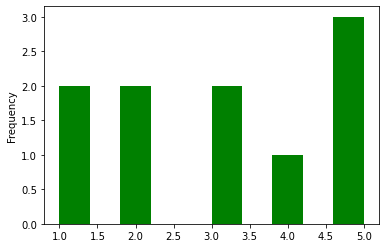

In [16]:
# your code here
result_values['val'].plot(kind='hist', color='green')

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [17]:
# your code here

def mean(x):
    return sum(x)/len(x)

In [18]:
mean(result_values['val'])

3.1

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [19]:
# your code here
def freq(x):
    d = {}
    for i in x:
        if d.get(i):
            d[i] += 1
        else:
            d[i] = 1
    return d

In [24]:
freq_results = freq(result_values['val'])
freq_results

{5: 3, 1: 2, 2: 2, 3: 2, 4: 1}

In [23]:
mean_freq = mean(freq_results)
mean_freq

3.0

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [27]:
# your code here
def median(x):
    sorted_list = sorted(x)
    i = int(len(x)/2)
    if i % 2 == 0:
        return sorted_list[i]
    else:
        return (sorted_list[i]+sorted_list[i-1])/2     

In [28]:
median((result_values['val']))

3.0

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [49]:
# your code here

def quartiles(x):
    lst = sorted(x)
    i = int(len(x)//2)
    q1 = median(lst[:i])
    q2 = median(lst)
    q3 = median(lst[i:])
    return f"1st quartile is: {q1}, the 2nd quartile is: {q2} and the 3rd quartile is: {q3}"

In [50]:
quartiles((result_values['val']))

'1st quartile is: 2, the 2nd quartile is: 3.0 and the 3rd quartile is: 5'

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [55]:
# your code here
df_dice_hundred = pd.read_csv('../data/roll_the_dice_hundred.csv')

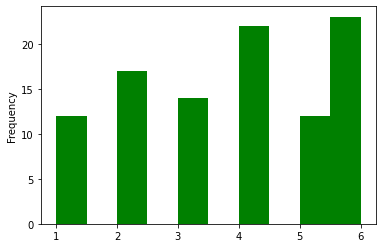

In [63]:
df_dice_hundred.sort_values(by=['value'], inplace=True)
df_dice_hundred['value'].plot(kind='hist', color='green')

In [ ]:
"""
The frequency of 5 and 6 seems higher. 
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [64]:
# your code here
mean(df_dice_hundred['value'])

3.74

#### 3.- Now, calculate the frequency distribution.


In [117]:
# your code here
freq_dice_hundred = freq(df_dice_hundred['value'])
freq_dice_hundred

{1: 12, 2: 17, 3: 14, 4: 22, 5: 12, 6: 23}

In [121]:
data = pd.DataFrame(freq_dice_hundred.items(), columns=['dice_val', 'freq'])

,dice_val,freq
0,1,12
1,2,17
2,3,14
3,4,22
4,5,12
5,6,23


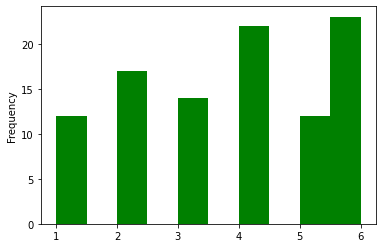

In [126]:
df_dice_hundred['value'].plot(kind='hist', color='green')

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [115]:
# your code here
df_dice_thousand = pd.read_csv('../data/roll_the_dice_thousand.csv')

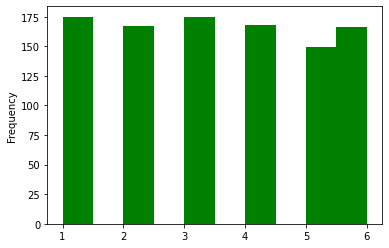

In [125]:
df_dice_thousand['value'].plot(kind='hist', color='green')

In [ ]:
"""
The higher the dices, the distribution seems to be more equal.
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [127]:
# your code here
df_population = pd.read_csv('../data/ages_population.csv')

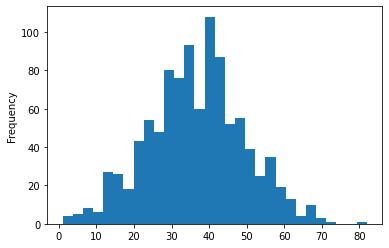

In [131]:
df_population['observation'].plot(kind='hist', bins=30)

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [128]:
# your code here
df_population.mean()

observation    36.56
dtype: float64

In [129]:
df_population.std()

observation    12.8165
dtype: float64

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [133]:
# your code here
df_population2 = pd.read_csv('../data/ages_population2.csv')

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0
...,...
995,26.0
996,22.0
997,21.0
998,19.0


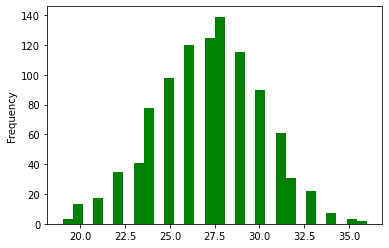

In [139]:
df_population2['observation'].plot(kind='hist', color='green', bins=30)

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
The distribution is different - the distribution fall varies. 
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [142]:
# your code here
df_population2.mean()

observation    27.155
dtype: float64

In [141]:
df_population2.std()

observation    2.969814
dtype: float64

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [60]:
# your code here
df_population3 = pd.read_csv('../data/ages_population3.csv')

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [143]:
# your code here
mean(df_population3['observation'])

41.989

In [144]:
df_population3['observation'].std()

16.14470595986593

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [146]:
# your code here
quartiles(df_population3['observation'])

'1st quartile is: 30.0, the 2nd quartile is: 40.0 and the 3rd quartile is: 53.0'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [148]:
# your code here

np.percentile(df_population3['observation'], [10,20,30,40])

array([22., 28., 32., 36.])